In [129]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu

In [130]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [131]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [133]:
train_df.isnull().sum()
# No Null value 

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [134]:
X_train = train_df.iloc[:, 1:]
Y_train = train_df.iloc[:, :1]
test_df.shape

(28000, 784)

In [135]:
# we are using artificial neural network
ann = Sequential()
ann.add(Dense(units = 128, activation = 'relu'))
ann.add(Dense(units = 64, activation = 'relu'))
ann.add(Dense(units = 32, activation = 'relu'))
ann.add(Dense(units = 16, activation = 'relu'))
ann.add(Dense(units = 10, activation = 'linear'))

In [136]:
ann.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
)

In [137]:
ann.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
1313/1313 [==============================] - 3s 2ms/step - loss: 2.0567
Epoch 2/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.6964
Epoch 3/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4863
Epoch 4/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3101
Epoch 5/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2167
Epoch 6/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1680
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1383
Epoch 8/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1154
Epoch 9/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0981
Epoch 10/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0846
Epoch 11/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0773
Epoch 12/100
1313/1313 [==============================] - 2s 2ms/step - lo

In [138]:
ann.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               100480    
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 10)                170       
                                                                 
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


In [139]:
Y_pred = ann.predict(test_df)

875/875 [==============================] - 1s 958us/step


In [140]:
Y_pred = tf.nn.softmax(Y_pred)

In [141]:
Label = np.argmax(Y_pred, axis=1)

In [142]:
Label

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [143]:
import csv
ImageId = np.arange(1, len(Label) + 1)
data = list(zip(ImageId, Label))
csv_file = 'predictions.csv'
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ImageId", "Label"])  # Write header
    writer.writerows(data)  # Write data rows

print("CSV file created successfully.")

CSV file created successfully.


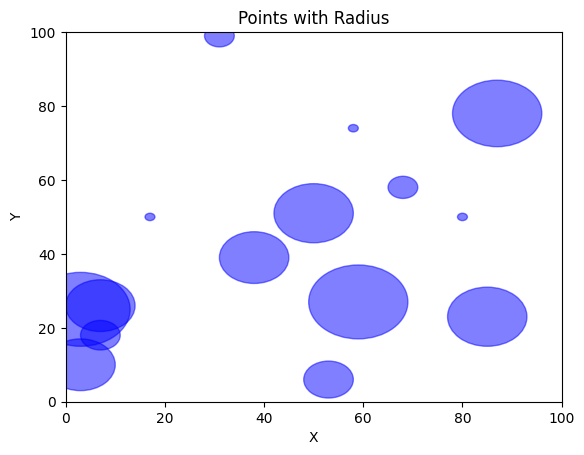

In [1]:
import matplotlib.pyplot as plt

data = [
    [7, 26, 7], [7, 18, 4], [3, 10, 7], [17, 50, 1], [3, 25, 10],
    [85, 23, 8], [80, 50, 1], [58, 74, 1], [38, 39, 7], [50, 51, 8],
    [31, 99, 3], [53, 6, 5], [59, 27, 10], [87, 78, 9], [68, 58, 3]
]

fig, ax = plt.subplots()

# Plot each point
for point in data:
    x, y, radius = point
    circle = plt.Circle((x, y), radius, color='b', alpha=0.5)
    ax.add_artist(circle)

# Set plot limits
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Set title
ax.set_title('Points with Radius')

# Display the plot
plt.show()
